## Analisis preliminar ARIMA

El proposito del siguiente es presentar un resultado proximal con datos preliminares de una ejecución de un modelo ARIMA, 
contiene una breve descripcion de los datos, análisis de series temporales siguiendo la metodólogia de Box-Jenkins, observando funciones de autocorrelacion simple y parcial, se aprecia que la serie es estacionaria y se estima un modelo ARIMA(1,0,1), se evalua estacionaridad en los residuos con el test de Dickey Fuller, y si bien se descarta la presencia de normalidad (no es requerida), por ultimo se presenta el pronostico a 18 meses adelante en un grafico con sus bandas de confianza.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np
import scipy.stats as stats

In [9]:
df = pd.read_excel("C:/Users/Usuario/Documents/Arima.xlsx",skiprows= 1)

In [ ]:
pip list


In [3]:
df.shape

(36, 3)

In [10]:
df.head()

,Año,Mes,Ejecución Comprometida
0,2022,1,34.809
1,2022,2,44.291
2,2022,3,159.877
3,2022,4,193.728
4,2022,5,168.697


In [4]:
df.columns

Index(['Año', 'Mes', 'Ejecución Comprometida'], dtype='object')

In [5]:
df.describe()

,Año,Mes,Ejecución Comprometida
count,36.000000,36.000000,36.000000
mean,2022.500000,9.500000,298.366278
std,0.507093,5.261722,133.169648
min,2022.000000,1.000000,34.809000
25%,2022.000000,5.000000,186.299000
50%,2022.500000,9.500000,361.042000
75%,2023.000000,14.000000,411.861000
max,2023.000000,18.000000,440.435000


In [11]:
def concat_y_m (row):
    year = (row["Año"])
    month = (row["Mes"])
    
    return f"{year}-{month}"
df["ym"] = df.apply(lambda row : concat_y_m(row), axis =1 )


In [13]:
df.head()

,Año,Mes,Ejecución Comprometida,ym
0,2022,1,34.809,2022.0-1.0
1,2022,2,44.291,2022.0-2.0
2,2022,3,159.877,2022.0-3.0
3,2022,4,193.728,2022.0-4.0
4,2022,5,168.697,2022.0-5.0


In [14]:
Xt= df[[  'Ejecución Comprometida']].copy()

Xt.rename(columns={ 'Ejecución Comprometida': 'ejec_cp'},inplace= True)

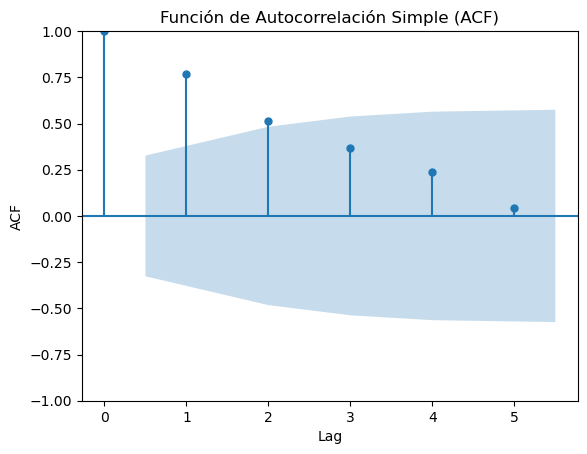

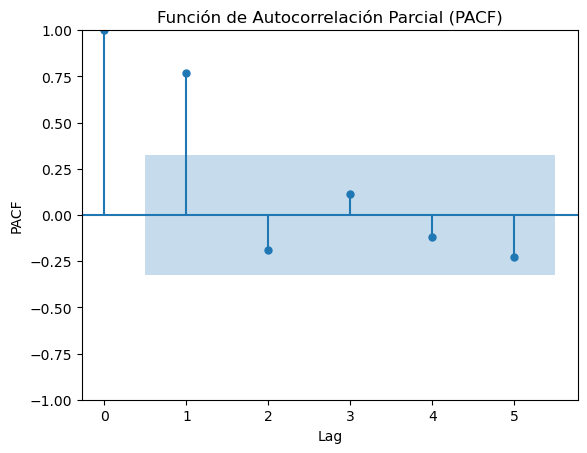

In [13]:
plot_acf(Xt, lags=5)  
plt.title('Función de Autocorrelación Simple (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Calcular la PACF y graficarla
plot_pacf(Xt, lags=5) 
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()





$$z_t = \alpha*z_{t-1}  +\psi\epsilon_{t-1} +\epsilon_{t}$$

$E$  tiene distrib $P$ calcula $e_i$ el p_value es $$P(e_i)$$

In [16]:
modelo = sm.tsa.ARIMA(Xt, order=(1, 0, 1))
resultado = modelo.fit()
residuos = resultado.resid

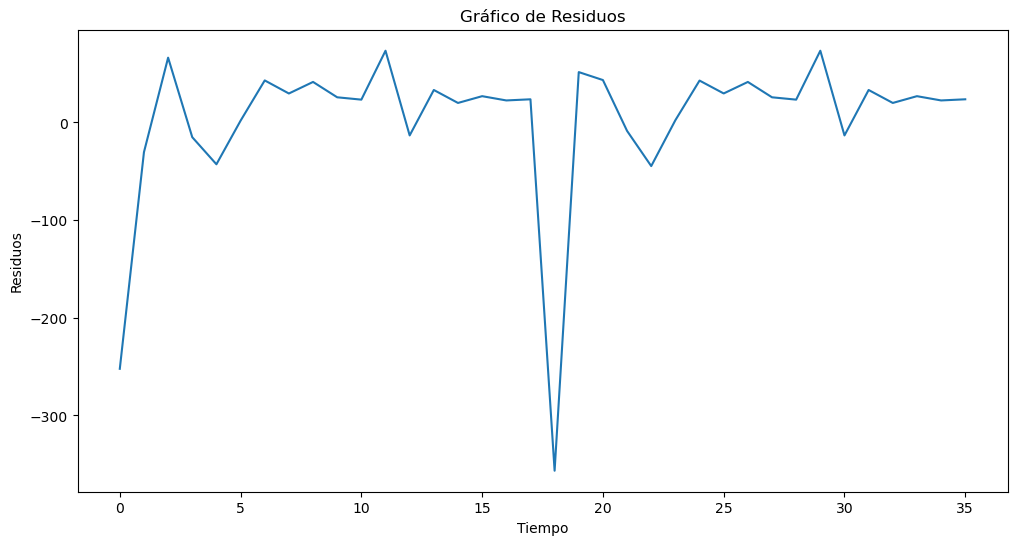

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(residuos)
plt.title('Gráfico de Residuos')
plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.show()

Estadística ADF: -6.995518453531646
Valor p ADF: 7.551525848899484e-10
Valores críticos ADF:
1%: -3.6327426647230316
5%: -2.9485102040816327
10%: -2.6130173469387756
Los residuos son estacionarios según la prueba ADF
Estadística KPSS: 0.20234126769196611
Valor p KPSS: 0.1
Valores críticos KPSS:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
Los residuos son estacionarios según la prueba KPSS


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8024\3095817519.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuos)


<Figure size 1200x400 with 0 Axes>

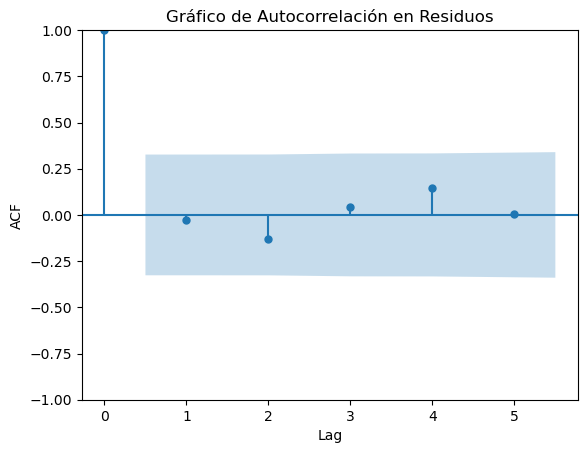

Prueba de Ljung-Box para autocorrelación en residuos:
Lag 1: Estadística=0.03, p-valor=0.8564
Lag 2: Estadística=0.70, p-valor=0.7042
Lag 3: Estadística=0.77, p-valor=0.8561
Lag 4: Estadística=1.70, p-valor=0.7915
Lag 5: Estadística=1.70, p-valor=0.8893
Los residuos no muestran autocorrelación significativa
Los residuos no muestran autocorrelación significativa
Los residuos no muestran autocorrelación significativa
Los residuos no muestran autocorrelación significativa
Los residuos no muestran autocorrelación significativa


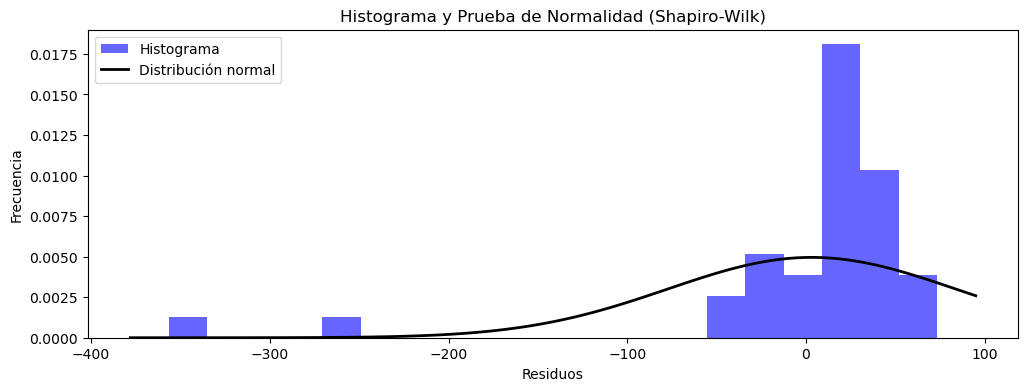

Estadística Shapiro-Wilk: 0.5680
Valor p Shapiro-Wilk: 0.0000
Los residuos no siguen una distribución normal según la prueba Shapiro-Wilk


In [19]:
# Prueba de Dickey-Fuller Aumentada (ADF) para estacionaridad
adf_test = adfuller(residuos)
adf_statistic, adf_pvalue, _, _, adf_critical_values, _ = adf_test
print(f'Estadística ADF: {adf_statistic}')
print(f'Valor p ADF: {adf_pvalue}')
print('Valores críticos ADF:')
for key, value in adf_critical_values.items():
    print(f'{key}: {value}')

if adf_pvalue < 0.05:
    print('Los residuos son estacionarios según la prueba ADF')
else:
    print('Los residuos no son estacionarios según la prueba ADF')

# Prueba KPSS para estacionaridad
kpss_test = kpss(residuos)
kpss_statistic, kpss_pvalue, _, kpss_critical_values = kpss_test
print(f'Estadística KPSS: {kpss_statistic}')
print(f'Valor p KPSS: {kpss_pvalue}')
print('Valores críticos KPSS:')
for key, value in kpss_critical_values.items():
    print(f'{key}: {value}')

if kpss_pvalue > 0.05:
    print('Los residuos son estacionarios según la prueba KPSS')
else:
    print('Los residuos no son estacionarios según la prueba KPSS')

# Gráfico de Autocorrelación en Residuos
plt.figure(figsize=(12, 4))
plot_acf(residuos, lags=5)
plt.title('Gráfico de Autocorrelación en Residuos')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Prueba de autocorrelación en residuos (Ljung-Box)
lag = 5  # Ajusta el número de rezagos a considerar
lb_test = acorr_ljungbox(residuos, lags=lag)
#lb_statistic, lb_pvalue = lb_test
print('Prueba de Ljung-Box para autocorrelación en residuos:')
for i in range(lag):
    print(f'Lag {i+1}: Estadística={lb_test.iloc[i, 0]:.2f}, p-valor={lb_test.iloc[i, 1]:.4f}')

for i in range(lag):
    if np.any(lb_test.iloc[i,1] < 0.05):
        print('Los residuos muestran autocorrelación significativa')
    else:
        print('Los residuos no muestran autocorrelación significativa')

# Histograma y Prueba de Normalidad (Shapiro-Wilk)
plt.figure(figsize=(12, 4))
plt.hist(residuos, bins=20, density=True, alpha=0.6, color='b', label='Histograma')
mu, sigma = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Distribución normal')
plt.title('Histograma y Prueba de Normalidad (Shapiro-Wilk)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

shapiro_statistic, shapiro_pvalue = stats.shapiro(residuos)
print(f'Estadística Shapiro-Wilk: {shapiro_statistic:.4f}')
print(f'Valor p Shapiro-Wilk: {shapiro_pvalue:.4f}')

if shapiro_pvalue > 0.05:
    print('Los residuos siguen una distribución normal según la prueba Shapiro-Wilk')
else:
    print('Los residuos no siguen una distribución normal según la prueba Shapiro-Wilk')

In [20]:
## todo generalizar metodo para que encuentre si la serie es estacionaria y entonces aplique ARMA(P,Q)

In [21]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                ejec_cp   No. Observations:                   36
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -205.817
Date:                Sat, 30 Sep 2023   AIC                            419.634
Time:                        19:31:04   BIC                            425.968
Sample:                             0   HQIC                           421.845
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        287.0031    108.588      2.643      0.008      74.174     499.832
ar.L1          0.7634      0.240      3.177      0.001       0.292       1.234
ma.L1          0.2854      0.299      0.955      0.340      -0.301       0.871
sigma2      5212.5287   1252.592      4.161      0.000    2757.494    7667.563
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):               444.96
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -3.71
Prob(H) (two-sided):                  0.13   Kurtosis:                        18.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
## pronostico 18 pasos adelante
pronostico = resultado.forecast(steps=18)

In [26]:
len(pronostico)

18

In [27]:
## bandas de confianza

forecasting = resultado.get_forecast(steps=18)
bandas = forecasting.conf_int(alpha=0.05)

In [28]:
 year = pd.DataFrame({"ano": [2018]*18})


base = pd.concat([pronostico,bandas],axis=1).reset_index()

In [29]:
pd.concat([year,base[['predicted_mean', 'lower ejec_cp', 'upper ejec_cp']]],axis=1)

,ano,predicted_mean,lower ejec_cp,upper ejec_cp
0,2018,391.365773,249.860598,532.870948
1,2018,366.676967,161.611668,571.742266
2,2018,347.828727,113.541770,582.115684
3,2018,333.439366,83.693311,583.185422
4,2018,322.454059,64.124351,580.783766
5,2018,314.067516,50.864095,577.270938
6,2018,307.664957,41.662177,573.667737
7,2018,302.777034,35.156211,570.397856
8,2018,299.045434,30.486066,567.604802
9,2018,296.196609,27.091738,565.301479


Text(0.5, 1.0, 'Pronóstico con Banda de Confianza (95%)')

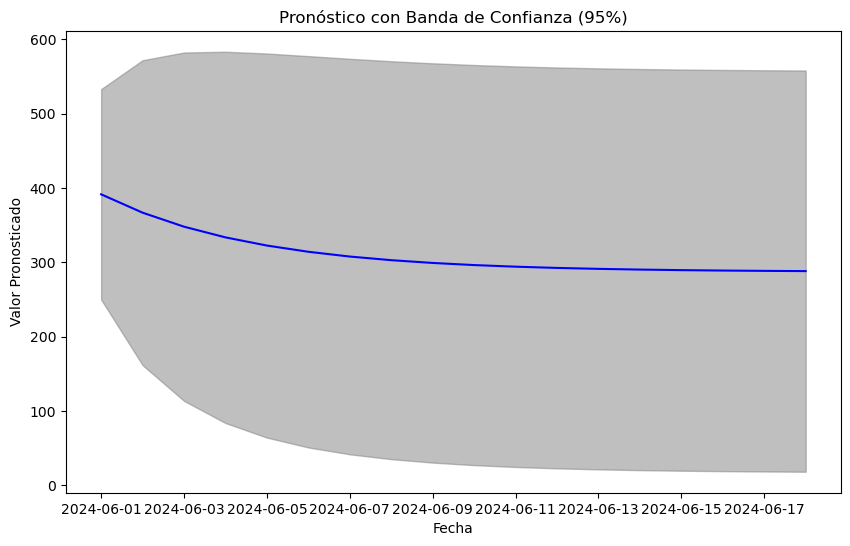

In [30]:
indices_temporales = pd.date_range(start='2024-06-01', periods=len(pronostico))

# Crear una gráfica
plt.figure(figsize=(10, 6))

# Graficar los valores pronosticados
plt.plot(indices_temporales, pronostico, label='Pronóstico', color='blue')

# Graficar las bandas de confianza
plt.fill_between(indices_temporales, bandas.iloc[:, 0], bandas.iloc[:, 1], color='gray', alpha=0.5, label='Banda de Confianza (95%)')

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Valor Pronosticado')
plt.title('Pronóstico con Banda de Confianza (95%)')

In [ ]:
pronostico.to_csv()